# ep7 exploring correlation between stock price trends and financial fundamentals

Starting from this episode, we explore correlations between the stock prices trend and the financial fundamentals of the public companies.  As was discussed previously, the price trends can be characterized by their principal components.  In addition, it was shown previously that the `GICSSector` attribute can be relevant to include in the exploration.  We will access other fundamental financial parameters via the `financialmodelingprep` API.  A link to the homepage of this API is included [here](https://financialmodelingprep.com/developer/docs/#Financial-Statements-Growth).

We will now enumerate some potentially relevant financial attributes:

1. **from income statement**: revenue, cost of revenue, gross profit, gross profit ratio (gross profit/revenue), research and development expenses, general and administrative expenses, selling and market expenses, other expenses, operating expenses, interest expenses, depreciation and amortization, operating income, operating income ratio (operating income / revenue), total other income expenses net, income before tax, income before tax ratio (income before tax / revenue), income tax expense, net income, net income ratio (net income / revenue)

The definitions of the financial attributes (within the scope of the income statement) listed so far appear to be obvious.  Other financial attributes that are important while not so self-explanatory are listed below and their definitions clarified when necessary.  EBITDA stands for earnings before interest, tax, depreciation and amortization.  eps stands for earnings per share.  eps diluted, weighted average shares outstanding (diluted) are also included in the list of available financial parameters.

2. **from balance sheet statement: TBC**

below is a code block for quick calculations to verify the definition of financial variables.

In [4]:
net_income = 55256000000
revenue = 260174000000
net_income / revenue

0.21238094505984456

The codeblock below performs a pull of the income statement information of `AAPL`.

In [1]:
import requests
import pandas as pd
symbol = 'AAPL'
apikey = '015f0a73ab04ecd346397b874d6b7e9a'
url = 'https://financialmodelingprep.com/api/v3/income-statement/'+symbol+'?period=quarter&limit=400&apikey='+apikey
income = requests.get(url).json()

In the codeblock below we implemented a function: `pull_income`, which can be applied repeatedly on various stocks.  In addition we used the `pandas.concat` function to concatenate the list of dataframes returned by individual pulls into one composite dataframe.  We save the dataframe in a file: `income_raw_1-200.csv`.  Note that our free API account has a limit of 250 requests per day.  Therefore, we will spread the compilation of all S&P 500 company income statements over a period of 3 days.  This is not a limitation as the financial statement will not change that frequently.

In [2]:
def pull_income(symbol):
    import requests
    import pandas as pd
    apikey = '015f0a73ab04ecd346397b874d6b7e9a'
    url = 'https://financialmodelingprep.com/api/v3/income-statement/'+symbol+'?period=quarter&limit=400&apikey='+apikey
    income = requests.get(url).json()
    df_income = pd.DataFrame(income)
    return df_income    

df_SP500 = pd.read_csv('SP500 list.csv')
df_income_composite = pd.concat(list(df_SP500.iloc[400:]['Symbol'].apply(pull_income)))
df_income_composite.to_csv('income_raw_401-.csv',index=False)
df_income_composite

,date,symbol,fillingDate,acceptedDate,period,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
0,2020-09-30,ROK,2020-11-10,2020-11-10 13:49:48,Q4,0.000000e+00,0.000000e+00,2.595000e+09,0.000000,0.0,...,0.000000,-112000000.0,1.023000e+09,0.000000,8.895652,8.895652,115000000.0,116000000.0,https://www.sec.gov/Archives/edgar/data/102447...,https://www.sec.gov/Archives/edgar/data/102447...
1,2020-06-30,ROK,2020-07-28,2020-07-28 13:15:43,Q3,1.394000e+09,8.398000e+08,5.542000e+08,0.397561,0.0,...,0.239957,20300000.0,3.178000e+08,0.227977,2.730240,2.730240,116400000.0,116400000.0,https://www.sec.gov/Archives/edgar/data/102447...,https://www.sec.gov/Archives/edgar/data/102447...
2,2020-03-31,ROK,2020-04-28 00:00:00,2020-04-28 13:46:06,Q2,1.681300e+09,9.825000e+08,6.988000e+08,0.415631,0.0,...,0.099566,37500000.0,1.322000e+08,0.078630,1.133790,1.133790,116600000.0,116600000.0,https://www.sec.gov/Archives/edgar/data/102447...,https://www.sec.gov/Archives/edgar/data/102447...
3,2019-12-31,ROK,2020-01-29 00:00:00,2020-01-29 14:36:35,Q1,1.684500e+09,9.816000e+08,7.029000e+08,0.417275,0.0,...,0.198635,19200000.0,3.107000e+08,0.184446,2.664670,2.664670,116600000.0,116600000.0,https://www.sec.gov/Archives/edgar/data/102447...,https://www.sec.gov/Archives/edgar/data/102447...
4,2019-09-30,ROK,2019-11-12 00:00:00,2019-11-12 10:58:12,Q4,1.730200e+09,1.007300e+09,7.229000e+08,0.417813,0.0,...,0.032597,48300000.0,8.100000e+06,0.004682,0.069110,0.069110,117200000.0,117200000.0,https://www.sec.gov/Archives/edgar/data/102447...,https://www.sec.gov/Archives/edgar/data/102447...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2020-09-30,ZTS,2020-11-05,2020-11-05 12:43:34,Q3,1.786000e+09,5.460000e+08,1.240000e+09,0.694289,112000000.0,...,0.334267,118000000.0,4.790000e+08,0.268197,1.010000,1.000000,475500000.0,478500000.0,https://www.sec.gov/Archives/edgar/data/155528...,https://www.sec.gov/Archives/edgar/data/155528...
1,2020-06-30,ZTS,2020-08-06,2020-08-06 14:42:13,Q2,1.548000e+09,4.510000e+08,1.097000e+09,0.708656,111000000.0,...,0.311370,106000000.0,3.770000e+08,0.243540,0.790000,0.790000,475300000.0,478100000.0,https://www.sec.gov/Archives/edgar/data/155528...,https://www.sec.gov/Archives/edgar/data/155528...
2,2020-03-31,ZTS,2020-05-06,2020-05-06 12:46:37,Q1,1.534000e+09,4.590000e+08,1.075000e+09,0.700782,107000000.0,...,0.323990,74000000.0,4.230000e+08,0.275750,0.890000,0.880000,475600000.0,479000000.0,https://www.sec.gov/Archives/edgar/data/155528...,https://www.sec.gov/Archives/edgar/data/155528...
3,2019-12-31,ZTS,2020-02-13,2020-02-13 15:13:44,Q4,1.674000e+09,5.300000e+08,1.144000e+09,0.683393,132000000.0,...,0.261051,53000000.0,3.840000e+08,0.229391,0.810000,0.800000,476400000.0,480200000.0,https://www.sec.gov/Archives/edgar/data/155528...,https://www.sec.gov/Archives/edgar/data/155528...


It is important to remember to keep `income_raw_1-200.csv` intact during operations.  In the codeblock below, we read the compiled income statement data from `income_raw_1-200.csv`.

In [19]:
import pandas as pd
df_income = pd.read_csv('income_raw_401-.csv')
df_income.head(10)

,date,symbol,fillingDate,acceptedDate,period,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,otherExpenses,operatingExpenses,costAndExpenses,interestExpense,depreciationAndAmortization,ebitda,ebitdaratio,operatingIncome,operatingIncomeRatio,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
0,2020-09-30,ROK,2020-11-10,2020-11-10 13:49:48,Q4,0.000000e+00,0.000000e+00,2.595000e+09,0.000000,0.0,-1.479000e+09,0.0,-29000000.0,-1.479000e+09,-1.479000e+09,103000000.0,31000000.0,1.167000e+09,0.000000,1.136000e+09,0.000000,-29000000.0,1.136000e+09,0.000000,-112000000.0,1.023000e+09,0.000000,8.895652,8.895652,115000000.0,116000000.0,https://www.sec.gov/Archives/edgar/data/102447...,https://www.sec.gov/Archives/edgar/data/102447...
1,2020-06-30,ROK,2020-07-28,2020-07-28 13:15:43,Q3,1.394000e+09,8.398000e+08,5.542000e+08,0.397561,0.0,3.702000e+08,0.0,-400000.0,2.197000e+08,1.059500e+09,25400000.0,43500000.0,4.070000e+08,0.291966,3.345000e+08,0.239957,0.0,3.345000e+08,0.239957,20300000.0,3.178000e+08,0.227977,2.730240,2.730240,116400000.0,116400000.0,https://www.sec.gov/Archives/edgar/data/102447...,https://www.sec.gov/Archives/edgar/data/102447...
2,2020-03-31,ROK,2020-04-28 00:00:00,2020-04-28 13:46:06,Q2,1.681300e+09,9.825000e+08,6.988000e+08,0.415631,0.0,3.520000e+08,0.0,9100000.0,5.314000e+08,1.513900e+09,25500000.0,42300000.0,2.375000e+08,0.141260,1.674000e+08,0.099566,0.0,1.674000e+08,0.099566,37500000.0,1.322000e+08,0.078630,1.133790,1.133790,116600000.0,116600000.0,https://www.sec.gov/Archives/edgar/data/102447...,https://www.sec.gov/Archives/edgar/data/102447...
3,2019-12-31,ROK,2020-01-29 00:00:00,2020-01-29 14:36:35,Q1,1.684500e+09,9.816000e+08,7.029000e+08,0.417275,0.0,4.032000e+08,0.0,9700000.0,3.683000e+08,1.349900e+09,26400000.0,41900000.0,3.982000e+08,0.236391,3.346000e+08,0.198635,0.0,3.346000e+08,0.198635,19200000.0,3.107000e+08,0.184446,2.664670,2.664670,116600000.0,116600000.0,https://www.sec.gov/Archives/edgar/data/102447...,https://www.sec.gov/Archives/edgar/data/102447...
4,2019-09-30,ROK,2019-11-12 00:00:00,2019-11-12 10:58:12,Q4,1.730200e+09,1.007300e+09,7.229000e+08,0.417813,0.0,4.051000e+08,0.0,234400000.0,6.665000e+08,1.673800e+09,27000000.0,40000000.0,1.234000e+08,0.071321,5.640000e+07,0.032597,0.0,5.640000e+07,0.032597,48300000.0,8.100000e+06,0.004682,0.069110,0.069110,117200000.0,117200000.0,https://www.sec.gov/Archives/edgar/data/102447...,https://www.sec.gov/Archives/edgar/data/102447...
5,2020-09-30,ROL,2020-10-28,2020-10-28 10:40:49,Q3,1.624928e+09,7.822480e+08,8.426800e+08,0.518595,0.0,4.971210e+08,0.0,0.0,4.971210e+08,1.279369e+09,0.0,65926000.0,3.337480e+08,0.205392,2.678220e+08,0.164821,0.0,2.678220e+08,0.164821,69617000.0,1.982050e+08,0.121978,0.600000,0.600000,327733000.0,327733000.0,https://www.sec.gov/Archives/edgar/data/84839/...,https://www.sec.gov/Archives/edgar/data/84839/...
6,2020-06-30,ROL,2020-07-31,2020-07-31 15:00:48,Q2,5.533290e+08,2.556220e+08,2.977070e+08,0.538029,0.0,1.712530e+08,0.0,0.0,1.931780e+08,4.488000e+08,-1460000.0,21925000.0,1.239850e+08,0.224071,1.045290e+08,0.188909,0.0,1.035200e+08,0.187086,28162000.0,7.535800e+07,0.136190,0.229920,0.229920,327763000.0,327763000.0,https://www.sec.gov/Archives/edgar/data/84839/...,https://www.sec.gov/Archives/edgar/data/84839/...
7,2020-03-31,ROL,2020-04-30,2020-04-30 15:16:31,Q1,4.879010e+08,2.511520e+08,2.367490e+08,0.485240,0.0,1.578620e+08,0.0,0.0,1.794590e+08,4.306110e+08,-2165000.0,21597000.0,7.483200e+07,0.153375,5.729000e+07,0.117421,0.0,5.540000e+07,0.113548,12132000.0,4.326800e+07,0.088682,0.132040,0.132040,327682000.0,327682000.0,https://www.sec.gov/Archives/edgar/data/84839/...,https://www.sec.gov/Archives/edgar/data/84839/...
8,2019-12-31,ROL,2020-02-28,2020-02-28 17:02:41,Q4,5.059850e+08,2.542840e+08

In [38]:
import pandas as pd
df_income = pd.read_csv('income_raw_1-200.csv')
df_income = df_income.append(pd.read_csv('income_raw_201-400.csv'))
df_income = df_income.append(pd.read_csv('income_raw_401-.csv'))
df_income

,date,symbol,fillingDate,acceptedDate,period,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
0,2020-09-30,MMM,2020-10-27,2020-10-27 16:51:15,Q3,8.350000e+09,4.303000e+09,4.047000e+09,0.484671,461000000.0,...,0.216168,387000000.0,1.418000e+09,0.169820,0.00000,0.00000,577000000.0,577000000.0,https://www.sec.gov/Archives/edgar/data/66740/...,https://www.sec.gov/Archives/edgar/data/66740/...
1,2020-06-30,MMM,2020-07-28,2020-07-28 15:55:48,Q2,7.176000e+09,3.750000e+09,3.426000e+09,0.477425,415000000.0,...,0.227007,342000000.0,1.290000e+09,0.179766,2.22107,2.22107,580800000.0,580800000.0,https://www.sec.gov/Archives/edgar/data/66740/...,https://www.sec.gov/Archives/edgar/data/66740/...
2,2020-03-31,MMM,2020-04-28,2020-04-28 15:23:50,Q1,8.075000e+09,4.100000e+09,3.975000e+09,0.492260,537000000.0,...,0.194056,273000000.0,1.292000e+09,0.160000,2.22184,2.22184,581500000.0,581500000.0,https://www.sec.gov/Archives/edgar/data/66740/...,https://www.sec.gov/Archives/edgar/data/66740/...
3,2019-12-31,MMM,2020-02-06,2020-02-06 16:16:31,Q4,8.111000e+09,4.309000e+09,3.802000e+09,0.468746,484000000.0,...,0.149427,242000000.0,9.690000e+08,0.119467,1.66295,1.66295,582700000.0,582700000.0,https://www.sec.gov/Archives/edgar/data/66740/...,https://www.sec.gov/Archives/edgar/data/66740/...
4,2019-09-30,MMM,2019-10-25,2019-10-25 14:04:26,Q3,7.991000e+09,4.182000e+09,3.809000e+09,0.476661,443000000.0,...,0.246027,378000000.0,1.583000e+09,0.198098,2.71527,2.71527,583000000.0,583000000.0,https://www.sec.gov/Archives/edgar/data/66740/...,https://www.sec.gov/Archives/edgar/data/66740/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,2020-09-30,ZTS,2020-11-05,2020-11-05 12:43:34,Q3,1.786000e+09,5.460000e+08,1.240000e+09,0.694289,112000000.0,...,0.334267,118000000.0,4.790000e+08,0.268197,1.01000,1.00000,475500000.0,478500000.0,https://www.sec.gov/Archives/edgar/data/155528...,https://www.sec.gov/Archives/edgar/data/155528...
516,2020-06-30,ZTS,2020-08-06,2020-08-06 14:42:13,Q2,1.548000e+09,4.510000e+08,1.097000e+09,0.708656,111000000.0,...,0.311370,106000000.0,3.770000e+08,0.243540,0.79000,0.79000,475300000.0,478100000.0,https://www.sec.gov/Archives/edgar/data/155528...,https://www.sec.gov/Archives/edgar/data/155528...
517,2020-03-31,ZTS,2020-05-06,2020-05-06 12:46:37,Q1,1.534000e+09,4.590000e+08,1.075000e+09,0.700782,107000000.0,...,0.323990,74000000.0,4.230000e+08,0.275750,0.89000,0.88000,475600000.0,479000000.0,https://www.sec.gov/Archives/edgar/data/155528...,https://www.sec.gov/Archives/edgar/data/155528...
518,2019-12-31,ZTS,2020-02-13,2020-02-13 15:13:44,Q4,1.674000e+09,5.300000e+08,1.144000e+09,0.683393,132000000.0,...,0.261051,53000000.0,3.840000e+08,0.229391,0.81000,0.80000,476400000.0,480200000.0,https://www.sec.gov/Archives/edgar/data/155528...,https://www.sec.gov/Archives/edgar/data/155528...


We will cleanse the data by first removing some columns that do not contain relevant information.

In [39]:
df_income.drop(['fillingDate','link','finalLink'],axis=1,inplace=True)
df_income.head(10)

,date,symbol,acceptedDate,period,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,...,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil
0,2020-09-30,MMM,2020-10-27 16:51:15,Q3,8.350000e+09,4.303000e+09,4.047000e+09,0.484671,461000000.0,1.677000e+09,...,104000000.0,1.805000e+09,0.216168,387000000.0,1.418000e+09,0.169820,0.000000,0.00000,5.770000e+08,5.770000e+08
1,2020-06-30,MMM,2020-07-28 15:55:48,Q2,7.176000e+09,3.750000e+09,3.426000e+09,0.477425,415000000.0,1.545000e+09,...,17000000.0,1.629000e+09,0.227007,342000000.0,1.290000e+09,0.179766,2.221070,2.22107,5.808000e+08,5.808000e+08
2,2020-03-31,MMM,2020-04-28 15:23:50,Q1,8.075000e+09,4.100000e+09,3.975000e+09,0.492260,537000000.0,1.768000e+09,...,17000000.0,1.567000e+09,0.194056,273000000.0,1.292000e+09,0.160000,2.221840,2.22184,5.815000e+08,5.815000e+08
3,2019-12-31,MMM,2020-02-06 16:16:31,Q4,8.111000e+09,4.309000e+09,3.802000e+09,0.468746,484000000.0,1.749000e+09,...,31000000.0,1.212000e+09,0.149427,242000000.0,9.690000e+08,0.119467,1.662950,1.66295,5.827000e+08,5.827000e+08
4,2019-09-30,MMM,2019-10-25 14:04:26,Q3,7.991000e+09,4.182000e+09,3.809000e+09,0.476661,443000000.0,1.455000e+09,...,38000000.0,1.966000e+09,0.246027,378000000.0,1.583000e+09,0.198098,2.715270,2.71527,5.830000e+08,5.830000e+08
5,2020-09-30,ABT,2020-11-04 16:01:05,Q3,8.853000e+09,3.966000e+09,4.887000e+09,0.552016,580000000.0,2.302000e+09,...,53000000.0,1.421000e+09,0.160511,189000000.0,1.232000e+09,0.139162,0.695118,0.69000,1.772362e+09,1.788000e+09
6,2020-06-30,ABT,2020-07-29 17:16:23,Q2,7.328000e+09,3.263000e+09,4.065000e+09,0.554722,564000000.0,2.276000e+09,...,-21000000.0,5.260000e+08,0.071779,-11000000.0,5.370000e+08,0.073281,0.303299,0.30000,1.770530e+09,1.785000e+09
7,2020-03-31,ABT,2020-04-29 16:16:47,Q1,7.726000e+09,3.281000e+09,4.445000e+09,0.575330,578000000.0,2.548000e+09,...,-4000000.0,6.330000e+08,0.081931,89000000.0,5.640000e+08,0.073000,0.318852,0.31000,1.768845e+09,1.781000e+09
8,2019-12-31,ABT,2020-02-21 16:28:23,Q4,8.314000e+09,3.434000e+09,4.880000e+09,0.586962,595000000.0,2.413000e+09,...,-10000000.0,1.240000e+09,0.149146,191000000.0,1.049000e+09,0.126173,0.595176,0.59000,1.762503e+09,1.781000e+09
9,2019-09-30,ABT,2019-10-31 16:02:42,Q3,8.076000e+09,3.358000e+09,4.718000e+09,0.584200,596000000.0,2.440000e+09,...,48000000.0,1.103000e+09,0.136578,143000000.0,9.600000e+08,0.118871,0.542847,0.53000,1.768456e+09,1.784000e+09


We will work on the two most recent quarterly reports for the moment.  By including two most recent quarterly reports in the analysis, we not only capture the absolute values of the financial parameters, but also capture the evolution from the last quarter to the current one.  Of course, we can include more historical quarterly reports in the analysis.  However, we will limit the level of complexity in our initial analysis to be able to avoid convolution due to overly rich information.

In [40]:
def select_two(df_group):
    if len(df_group) >=3:
        return df_group.iloc[[1,2]]
    else:
        print(df_group.iloc[0]['symbol'],'not enough quarterly data')
        pass 

df_income_recent = df_income.groupby(by=['symbol']).apply(select_two)
df_income_recent = df_income_recent.drop(columns=['symbol']).reset_index().drop(columns=['level_1'])

BRK-B not enough quarterly data


We will use `df_income_recent` for analysis.  We would like to perform some feature engineering first to identify the most influencial features.  We will use 'Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists by Alice Zheng and Amanda Casari' as a reference.  It is stated in Zheng and Amanda that good features can make prediction easier while bad features might require more complicated model to achieve the same level of performance.



In [41]:
df_income_recent.columns

Index(['symbol', 'date', 'acceptedDate', 'period', 'revenue', 'costOfRevenue',
       'grossProfit', 'grossProfitRatio', 'researchAndDevelopmentExpenses',
       'generalAndAdministrativeExpenses', 'sellingAndMarketingExpenses',
       'otherExpenses', 'operatingExpenses', 'costAndExpenses',
       'interestExpense', 'depreciationAndAmortization', 'ebitda',
       'ebitdaratio', 'operatingIncome', 'operatingIncomeRatio',
       'totalOtherIncomeExpensesNet', 'incomeBeforeTax',
       'incomeBeforeTaxRatio', 'incomeTaxExpense', 'netIncome',
       'netIncomeRatio', 'eps', 'epsdiluted', 'weightedAverageShsOut',
       'weightedAverageShsOutDil'],
      dtype='object')

We will first compute the  quarter-over-quarter growth/decline of `['revenue', 'costOfRevenue','grossProfit','researchAndDevelopmentExpenses','generalAndAdministrativeExpenses','sellingAndMarketingExpenses','otherExpenses','operatingExpenses','costAndExpenses','interestExpense', 'depreciationAndAmortization', 'ebitda','operatingIncome', 'totalOtherIncomeExpensesNet', 'incomeBeforeTax', 'incomeTaxExpense', 'netIncome', 'eps', 'epsdiluted', 'weightedAverageShsOut','weightedAverageShsOutDil']`.

In [42]:
ls_column_dollar = ['symbol','revenue', 'costOfRevenue','grossProfit','researchAndDevelopmentExpenses','generalAndAdministrativeExpenses','sellingAndMarketingExpenses','otherExpenses','operatingExpenses','costAndExpenses','interestExpense', 'depreciationAndAmortization', 'ebitda','operatingIncome', 'totalOtherIncomeExpensesNet', 'incomeBeforeTax', 'incomeTaxExpense', 'netIncome', 'eps', 'epsdiluted', 'weightedAverageShsOut','weightedAverageShsOutDil']
df_income_dollar = df_income_recent[ls_column_dollar]
ls_new_column_name = []
for column_name in ls_column_dollar:
    ls_new_column_name.append(column_name+'_var')
ls_new_column_name.pop(0)

ls = []
for name,group in df_income_dollar.groupby(by=['symbol']):
    group_cp = group.drop(['symbol'],axis=1)
    var = (group_cp.iloc[0]-group_cp.iloc[1])
    var.rename(name,inplace=True)
    ls.append(var)
df_var = pd.DataFrame(ls)
df_var.columns = ls_new_column_name
print(len(df_var))
df_var.head(10)

502


,revenue_var,costOfRevenue_var,grossProfit_var,researchAndDevelopmentExpenses_var,generalAndAdministrativeExpenses_var,sellingAndMarketingExpenses_var,otherExpenses_var,operatingExpenses_var,costAndExpenses_var,interestExpense_var,...,ebitda_var,operatingIncome_var,totalOtherIncomeExpensesNet_var,incomeBeforeTax_var,incomeTaxExpense_var,netIncome_var,eps_var,epsdiluted_var,weightedAverageShsOut_var,weightedAverageShsOutDil_var
A,-1.190000e+08,-5.100000e+07,-6.800000e+07,9.300000e+07,-4.400000e+07,0.0,15000000.0,45000000.0,-6.000000e+06,0.0,...,-1.010000e+08,-1.130000e+08,1.400000e+07,-9.800000e+07,-2000000.0,-9.600000e+07,-0.305670,-0.30567,-1000000.0,-1000000.0
AAL,-6.893000e+09,-3.504000e+09,-3.389000e+09,0.000000e+00,-2.620000e+08,-262000000.0,176000000.0,-865000000.0,-4.631000e+09,-3000000.0,...,-2.142000e+09,-2.262000e+09,2.546000e+09,2.310000e+08,57000000.0,1.740000e+08,0.440000,0.44000,3094000.0,3094000.0
AAP,-1.965020e+08,-1.195250e+08,-7.697700e+07,0.000000e+00,-2.540520e+08,0.0,5989000.0,-261397000.0,-3.809220e+08,-1179000.0,...,1.692310e+08,1.844200e+08,9.106000e+06,1.923470e+08,45975000.0,1.463720e+08,2.113220,2.11322,-98000.0,-98000.0
AAPL,1.372000e+09,1.062000e+09,3.100000e+08,1.930000e+08,-1.210000e+08,0.0,-236000000.0,72000000.0,1.134000e+09,-60000000.0,...,-9.200000e+07,2.380000e+08,-1.480000e+08,2.000000e+06,-2000000.0,4.000000e+06,0.007540,0.00754,-199612000.0,-199612000.0
ABBV,1.806000e+09,1.769000e+09,3.700000e+07,1.056000e+09,1.832000e+09,0.0,-730000000.0,0.0,4.657000e+09,69000000.0,...,-2.702000e+09,-2.851000e+09,-7.540000e+08,-3.791000e+09,-42000000.0,-3.748000e+09,-2.480000,-2.48000,166000000.0,163000000.0
ABC,-2.050862e+09,-1.888471e+09,-1.623910e+08,0.000000e+00,-2.652800e+07,-26528000.0,-2182000.0,666885.0,-1.913379e+09,-2805000.0,...,-1.478350e+08,-1.374830e+08,2.084420e+08,6.763200e+07,751475000.0,-6.708380e+08,-3.260000,-3.23000,-1716000.0,-1518000.0
ABMD,-4.180800e+07,-3.385000e+06,-3.842300e+07,1.011000e+06,-1.544800e+07,0.0,46453000.0,0.0,-1.782200e+07,0.0,...,-2.380500e+07,-2.398600e+07,4.574900e+07,2.176300e+07,8973000.0,1.279000e+07,0.990000,0.98000,45010000.0,45549000.0
ABT,-3.980000e+08,-1.800000e+07,-3.800000e+08,-1.400000e+07,-2.720000e+08,0.0,-23000000.0,0.0,-3.120000e+08,-5000000.0,...,-1.210000e+08,-8.600000e+07,-1.700000e+07,-1.070000e+08,-100000000.0,-2.700000e+07,-0.015553,-0.01000,1684673.0,4000000.0
ACN,-1.502000e+08,-3.197170e+08,1.695170e+08,0.000000e+00,-5.427100e+07,-44449000.0,-319717000.0,-54271000.0,-3.739880e+08,-3606000.0,...,1.630600e+08,2.237880e+08,-3.179100e+07,1.712170e+08,170660000.0,-6.538000e+06,-0.034490,-0.03449,8122280.0,8122280.0
ADBE,3.700000e+07,-3.700000e+07,7.400000e+07,0.000000e+00,-3.000000e+06,44000000.0,-2000000.0,-5000000.0,-4.200000e+07,-5000000.0,...,7.600000e+07,7.900000e+07,-6.000000e+06,8.100000e+07,-64000000.0,1.450000e+08,0.311070,0.31107,-3000000.0,-3000000.0


We will now remove the earlier quarterly statement in the dataframe, retain the most recent quarterly statement and merge the remaining dataframe with the variation data

In [45]:
# rerun this block is df_income_1Q_var is corrupted
ls = []
for name,group in df_income_recent.groupby(by=['symbol']):    
    ls.append(group.iloc[0])
df_income_recent = pd.DataFrame(ls)
df_income_recent = df_income_recent.set_index(['symbol'])
df_income_recent_var = pd.concat([df_income_recent,df_var],join='outer',axis=1)
df_income_recent_var.drop(['date','period'],axis=1,inplace=True)
df_income_recent_var

,acceptedDate,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,otherExpenses,operatingExpenses,...,ebitda_var,operatingIncome_var,totalOtherIncomeExpensesNet_var,incomeBeforeTax_var,incomeTaxExpense_var,netIncome_var,eps_var,epsdiluted_var,weightedAverageShsOut_var,weightedAverageShsOutDil_var
symbol,,,,,,,,,,,,,,,,,,,,,
A,2020-05-29 20:10:41,1.238000e+09,5.830000e+08,6.550000e+08,0.529079,1.970000e+08,3.560000e+08,0.0,36000000.0,5.530000e+08,...,-1.010000e+08,-1.130000e+08,1.400000e+07,-9.800000e+07,-2000000.0,-9.600000e+07,-0.30567,-0.30567,-1000000.0,-1000000.0
AAL,2020-07-23 07:04:41,1.622000e+09,4.946000e+09,-3.324000e+09,-2.049322,0.000000e+00,4.300000e+07,43000000.0,71000000.0,5.450000e+08,...,-2.142000e+09,-2.262000e+09,2.546000e+09,2.310000e+08,57000000.0,1.740000e+08,0.44000,0.44000,3094000.0,3094000.0
AAP,2020-08-18 16:40:43,2.501380e+09,1.404371e+09,1.097009e+09,0.438562,0.000000e+00,8.240490e+08,0.0,0.0,8.341640e+08,...,1.692310e+08,1.844200e+08,9.106000e+06,1.923470e+08,45975000.0,1.463720e+08,2.11322,2.11322,-98000.0,-98000.0
AAPL,2020-07-30 19:29:09,5.968500e+10,3.700500e+10,2.268000e+10,0.379995,4.758000e+09,4.831000e+09,0.0,46000000.0,9.589000e+09,...,-9.200000e+07,2.380000e+08,-1.480000e+08,2.000000e+06,-2000000.0,4.000000e+06,0.00754,0.00754,-199612000.0,-199612000.0
ABBV,2020-08-04 09:55:42,1.042500e+10,3.711000e+09,6.714000e+09,0.644029,2.435000e+09,3.527000e+09,0.0,-802000000.0,0.000000e+00,...,-2.702000e+09,-2.851000e+09,-7.540000e+08,-3.791000e+09,-42000000.0,-3.748000e+09,-2.48000,-2.48000,166000000.0,163000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,2020-08-05 17:26:47,1.198000e+09,6.490000e+08,5.490000e+08,0.458264,0.000000e+00,2.590000e+08,264000000.0,-2000000.0,3.600000e+07,...,-9.900000e+07,-9.900000e+07,2.750000e+08,1.620000e+08,39000000.0,1.230000e+08,0.40000,0.40000,1000000.0,0.0
ZBH,2020-08-04 20:07:47,1.226100e+09,4.245000e+08,8.016000e+08,0.653780,8.770000e+07,6.650000e+08,0.0,3800000.0,9.700000e+06,...,-3.104000e+08,-3.139000e+08,5.990000e+08,2.820000e+08,-18900000.0,3.019000e+08,1.46000,1.46000,300000.0,300000.0
ZBRA,2020-07-28 16:03:27,9.560000e+08,5.370000e+08,4.190000e+08,0.438285,9.800000e+07,1.830000e+08,109000000.0,19000000.0,3.000000e+08,...,-3.100000e+07,-3.200000e+07,0.000000e+00,0.000000e+00,-11000000.0,1.100000e+07,0.22454,0.22454,-642310.0,-642310.0


It is noted that `grossProfitRatio` is the ratio between `grossProfit` and `revenue`, suggested by the plot below (with few exception).  Therefore, it is fine to include only `grossProfitRatio` in the dataset and remove `grossProfit` as the two variables contain the same amount of information of the dataset.  Similarily, `operatingIncome`,`incomeBeforeTax`, `ebitda`, and `netIncome` can also be removed from the dataset.

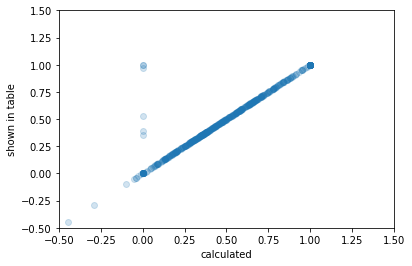

In [46]:
import matplotlib.pyplot as plt
plt.scatter(df_income_recent_var['grossProfit']/df_income_recent_var['revenue'],df_income_recent_var['grossProfitRatio'],alpha=0.2)
plt.xlabel('calculated')
plt.ylabel('shown in table')
plt.xlim((-0.5,1.5))
plt.ylim((-0.5,1.5))
plt.show()

In [47]:
df_income_recent_var.drop(['ebitda','grossProfit','operatingIncome','incomeBeforeTax','netIncome'],axis=1,inplace=True)
df_income_recent_var

,acceptedDate,revenue,costOfRevenue,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,otherExpenses,operatingExpenses,costAndExpenses,...,ebitda_var,operatingIncome_var,totalOtherIncomeExpensesNet_var,incomeBeforeTax_var,incomeTaxExpense_var,netIncome_var,eps_var,epsdiluted_var,weightedAverageShsOut_var,weightedAverageShsOutDil_var
symbol,,,,,,,,,,,,,,,,,,,,,
A,2020-05-29 20:10:41,1.238000e+09,5.830000e+08,0.529079,1.970000e+08,3.560000e+08,0.0,36000000.0,5.530000e+08,1.136000e+09,...,-1.010000e+08,-1.130000e+08,1.400000e+07,-9.800000e+07,-2000000.0,-9.600000e+07,-0.30567,-0.30567,-1000000.0,-1000000.0
AAL,2020-07-23 07:04:41,1.622000e+09,4.946000e+09,-2.049322,0.000000e+00,4.300000e+07,43000000.0,71000000.0,5.450000e+08,5.534000e+09,...,-2.142000e+09,-2.262000e+09,2.546000e+09,2.310000e+08,57000000.0,1.740000e+08,0.44000,0.44000,3094000.0,3094000.0
AAP,2020-08-18 16:40:43,2.501380e+09,1.404371e+09,0.438562,0.000000e+00,8.240490e+08,0.0,0.0,8.341640e+08,2.238535e+09,...,1.692310e+08,1.844200e+08,9.106000e+06,1.923470e+08,45975000.0,1.463720e+08,2.11322,2.11322,-98000.0,-98000.0
AAPL,2020-07-30 19:29:09,5.968500e+10,3.700500e+10,0.379995,4.758000e+09,4.831000e+09,0.0,46000000.0,9.589000e+09,4.659400e+10,...,-9.200000e+07,2.380000e+08,-1.480000e+08,2.000000e+06,-2000000.0,4.000000e+06,0.00754,0.00754,-199612000.0,-199612000.0
ABBV,2020-08-04 09:55:42,1.042500e+10,3.711000e+09,0.644029,2.435000e+09,3.527000e+09,0.0,-802000000.0,0.000000e+00,9.673000e+09,...,-2.702000e+09,-2.851000e+09,-7.540000e+08,-3.791000e+09,-42000000.0,-3.748000e+09,-2.48000,-2.48000,166000000.0,163000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,2020-08-05 17:26:47,1.198000e+09,6.490000e+08,0.458264,0.000000e+00,2.590000e+08,264000000.0,-2000000.0,3.600000e+07,9.080000e+08,...,-9.900000e+07,-9.900000e+07,2.750000e+08,1.620000e+08,39000000.0,1.230000e+08,0.40000,0.40000,1000000.0,0.0
ZBH,2020-08-04 20:07:47,1.226100e+09,4.245000e+08,0.653780,8.770000e+07,6.650000e+08,0.0,3800000.0,9.700000e+06,1.334600e+09,...,-3.104000e+08,-3.139000e+08,5.990000e+08,2.820000e+08,-18900000.0,3.019000e+08,1.46000,1.46000,300000.0,300000.0
ZBRA,2020-07-28 16:03:27,9.560000e+08,5.370000e+08,0.438285,9.800000e+07,1.830000e+08,109000000.0,19000000.0,3.000000e+08,8.370000e+08,...,-3.100000e+07,-3.200000e+07,0.000000e+00,0.000000e+00,-11000000.0,1.100000e+07,0.22454,0.22454,-642310.0,-642310.0


We now inspect the correlation between variables.  To discover variables, i.e., columns, that are strongly correlated with each other, we use the `pandas.DataFrame.corr` method to compute the standard correlation coefficient between columns.  The standard correlation coefficient, also known as the Pearson correlation coefficient, between two variables $x$ and $y$ is defined according to the equation below:

$$r=\frac{\Sigma(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\Sigma(x_i-\bar{x})^2\Sigma(y_i-\bar{y})^2}}$$

Note that if $x_i=y_i$

$$r = 1$$

if $x_i =-y_i$

$$r = -1$$

In [48]:
pd.set_option('display.max_column',50)
df_income_recent_var_corr = df_income_recent_var.corr()
# df_income_1Q_var_corr[df_income_1Q_var_corr[:][:]>0.8]

ls_index = df_income_recent_var_corr.index
ls_column = df_income_recent_var_corr.columns

for i in range(len(ls_index)):
    for j in range(i+1,len(ls_index)):
        if df_income_recent_var_corr.iloc[i][j] > 0.8:
            print(ls_index[i],ls_column[j])

revenue costAndExpenses
costOfRevenue grossProfit_var
grossProfitRatio costOfRevenue_var
ebitdaratio operatingIncomeRatio
ebitdaratio incomeBeforeTaxRatio
ebitdaratio netIncomeRatio
operatingIncomeRatio incomeBeforeTaxRatio
operatingIncomeRatio netIncomeRatio
incomeBeforeTaxRatio netIncomeRatio
eps epsdiluted
eps eps_var
eps epsdiluted_var
epsdiluted eps_var
epsdiluted epsdiluted_var
weightedAverageShsOut weightedAverageShsOutDil
ebitda_var netIncome_var
operatingIncome_var incomeBeforeTax_var
operatingIncome_var netIncome_var
incomeBeforeTax_var netIncome_var
eps_var epsdiluted_var
weightedAverageShsOut_var weightedAverageShsOutDil_var


As can be seen from the correlation analysis above `revenue` and `costAndExpenses` correlate strongly with each other, as can be seen from the plot below.  It is sufficient to keep `ebitdaratio` and remove `operatingIncomeRatio`, `incomeBeforeTaxRatio` and `netIncomeRatio`.  It is sufficient to remove `epsdiluted`, `epsdiluted_var` and `weightedAverageShsOutDil`.

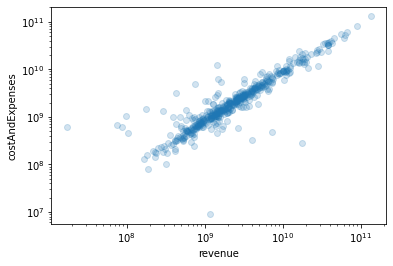

In [49]:
plt.loglog(df_income_recent_var['revenue'],df_income_recent_var['costAndExpenses'],'o',alpha=0.2)
plt.xlabel('revenue')
plt.ylabel('costAndExpenses')
plt.show()

In [50]:
df_income_recent_var.drop(['costAndExpenses','operatingIncomeRatio',
                       'incomeBeforeTaxRatio','netIncomeRatio','epsdiluted','epsdiluted_var'
                       ,'weightedAverageShsOutDil','weightedAverageShsOutDil_var'],axis=1,inplace=True)
df_income_recent_var

,acceptedDate,revenue,costOfRevenue,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,otherExpenses,operatingExpenses,interestExpense,depreciationAndAmortization,ebitdaratio,totalOtherIncomeExpensesNet,incomeTaxExpense,eps,weightedAverageShsOut,revenue_var,costOfRevenue_var,grossProfit_var,researchAndDevelopmentExpenses_var,generalAndAdministrativeExpenses_var,sellingAndMarketingExpenses_var,otherExpenses_var,operatingExpenses_var,costAndExpenses_var,interestExpense_var,depreciationAndAmortization_var,ebitda_var,operatingIncome_var,totalOtherIncomeExpensesNet_var,incomeBeforeTax_var,incomeTaxExpense_var,netIncome_var,eps_var,weightedAverageShsOut_var
symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,2020-05-29 20:10:41,1.238000e+09,5.830000e+08,0.529079,1.970000e+08,3.560000e+08,0.0,36000000.0,5.530000e+08,20000000.0,7.600000e+07,0.175283,3.700000e+07,2.000000e+07,0.32372,3.120000e+08,-1.190000e+08,-5.100000e+07,-6.800000e+07,9.300000e+07,-4.400000e+07,0.0,15000000.0,45000000.0,-6.000000e+06,0.0,-3000000.0,-1.010000e+08,-1.130000e+08,1.400000e+07,-9.800000e+07,-2000000.0,-9.600000e+07,-0.30567,-1000000.0
AAL,2020-07-23 07:04:41,1.622000e+09,4.946000e+09,-2.049322,0.000000e+00,4.300000e+07,43000000.0,71000000.0,5.450000e+08,254000000.0,0.000000e+00,-2.389642,1.542000e+09,-5.920000e+08,-4.82000,4.288070e+08,-6.893000e+09,-3.504000e+09,-3.389000e+09,0.000000e+00,-2.620000e+08,-262000000.0,176000000.0,-865000000.0,-4.631000e+09,-3000000.0,0.0,-2.142000e+09,-2.262000e+09,2.546000e+09,2.310000e+08,57000000.0,1.740000e+08,0.44000,3094000.0
AAP,2020-08-18 16:40:43,2.501380e+09,1.404371e+09,0.438562,0.000000e+00,8.240490e+08,0.0,0.0,8.341640e+08,-13422000.0,5.664200e+07,0.118239,3.117000e+06,6.258000e+07,2.74136,6.929400e+07,-1.965020e+08,-1.195250e+08,-7.697700e+07,0.000000e+00,-2.540520e+08,0.0,5989000.0,-261397000.0,-3.809220e+08,-1179000.0,-21937000.0,1.692310e+08,1.844200e+08,9.106000e+06,1.923470e+08,45975000.0,1.463720e+08,2.11322,-98000.0
AAPL,2020-07-30 19:29:09,5.968500e+10,3.700500e+10,0.379995,4.758000e+09,4.831000e+09,0.0,46000000.0,9.589000e+09,697000000.0,2.752000e+09,0.277892,-1.580000e+08,1.884000e+09,0.64601,1.741915e+10,1.372000e+09,1.062000e+09,3.100000e+08,1.930000e+08,-1.210000e+08,0.0,-236000000.0,72000000.0,1.134000e+09,-60000000.0,-34000000.0,-9.200000e+07,2.380000e+08,-1.480000e+08,2.000000e+06,-2000000.0,4.000000e+06,0.00754,-199612000.0
ABBV,2020-08-04 09:55:42,1.042500e+10,3.711000e+09,0.644029,2.435000e+09,3.527000e+09,0.0,-802000000.0,0.000000e+00,632000000.0,0.000000e+00,0.146091,-8.310000e+08,4.600000e+07,-0.46000,1.647000e+09,1.806000e+09,1.769000e+09,3.700000e+07,1.056000e+09,1.832000e+09,0.0,-730000000.0,0.0,4.657000e+09,69000000.0,0.0,-2.702000e+09,-2.851000e+09,-7.540000e+08,-3.791000e+09,-42000000.0,-3.748000e+09,-2.48000,166000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,2020-08-05 17:26:47,1.198000e+09,6.490000e+08,0.458264,0.000000e+00,2.590000e+08,264000000.0,-2000000.0,3.600000e+07,132000000.0,0.000000e+00,0.262104,9.900000e+07,5.100000e+07,0.68000,3.030000e+08,-6.500000e+07,-1.700000e+07,-4.800000e+07,0.000000e+00,5.100000e+07,-46000000.0,1000000.0,-22000000.0,3.400000e+07,14000000.0,0.0,-9.900000e+07,-9.900000e+07,2.750000e+08,1.620000e+08,39000000.0,1.230000e+08,0.40000,1000000.0
ZBH,2020-08-04 20:07:47,1.226100e+09,4.245000e+08,0.653780,8.770000e+07,6.650000e+08,0.0,3800000.0,9.700000e+06,54000000.0,0.000000e+00,0.123155,-5.940000e+07,-1.370000e+07,-1.00000,2.068000e+08,-5.577000e+08,-6.260000e+07,-4.951000e+08,-1.070000e+07,-1.639000e+08,0.0,800000.0,-6700000.0,-2.438000e+08,3100000.0,0.0,-3.104000e+08,-3.139000e+08,5.990000e+08,2.820000e+08,-18900000.0,3.019000e+08,1.46000,300000.0
ZBRA,2020-07-28 16:03:27,9.560000e+08,5.370000e+08,0.438285,9.800000e+07,1.830000e+08,109000000.0,19000000.0,3.000000e+08,14000000.0,3.400000e+07,0.

In [51]:
df_income_recent_var.columns

Index(['acceptedDate', 'revenue', 'costOfRevenue', 'grossProfitRatio',
       'researchAndDevelopmentExpenses', 'generalAndAdministrativeExpenses',
       'sellingAndMarketingExpenses', 'otherExpenses', 'operatingExpenses',
       'interestExpense', 'depreciationAndAmortization', 'ebitdaratio',
       'totalOtherIncomeExpensesNet', 'incomeTaxExpense', 'eps',
       'weightedAverageShsOut', 'revenue_var', 'costOfRevenue_var',
       'grossProfit_var', 'researchAndDevelopmentExpenses_var',
       'generalAndAdministrativeExpenses_var',
       'sellingAndMarketingExpenses_var', 'otherExpenses_var',
       'operatingExpenses_var', 'costAndExpenses_var', 'interestExpense_var',
       'depreciationAndAmortization_var', 'ebitda_var', 'operatingIncome_var',
       'totalOtherIncomeExpensesNet_var', 'incomeBeforeTax_var',
       'incomeTaxExpense_var', 'netIncome_var', 'eps_var',
       'weightedAverageShsOut_var'],
      dtype='object')

As can be seen from the table above, the majority of the financial parameters varies over several orders of magnitude and can be both positive and negative.  Let's try to use the `pandas.DataFrame.hist` method to inspect the distribution of the values.  It is noted that the wide distribution causes visual inspection of the histograms challenging.  We will hold the thought of plotting histograms and see if some transformation of the numbers can be performed prior to visualizing the distribution.  We found that Zheng and Casari recommended scaling of the variables that span a wide range.  We will scale the dollar values with respect to the revenue of the company.

In [52]:
df_income_recent_var.columns
df_income_recent_var[['costOfRevenue','researchAndDevelopmentExpenses', 'generalAndAdministrativeExpenses',
       'sellingAndMarketingExpenses', 'otherExpenses', 'operatingExpenses',
       'interestExpense', 'depreciationAndAmortization','totalOtherIncomeExpensesNet', 'incomeTaxExpense',
       'weightedAverageShsOut','revenue_var', 'costOfRevenue_var',
       'grossProfit_var', 'researchAndDevelopmentExpenses_var',
       'generalAndAdministrativeExpenses_var',
       'sellingAndMarketingExpenses_var', 'otherExpenses_var',
       'operatingExpenses_var', 'costAndExpenses_var', 'interestExpense_var',
       'depreciationAndAmortization_var', 'ebitda_var', 'operatingIncome_var',
       'totalOtherIncomeExpensesNet_var', 'incomeBeforeTax_var',
       'incomeTaxExpense_var', 'netIncome_var',
       'weightedAverageShsOut_var']] = \
df_income_recent_var[['costOfRevenue','researchAndDevelopmentExpenses', 'generalAndAdministrativeExpenses',
       'sellingAndMarketingExpenses', 'otherExpenses', 'operatingExpenses',
       'interestExpense', 'depreciationAndAmortization','totalOtherIncomeExpensesNet', 'incomeTaxExpense',
       'weightedAverageShsOut','revenue_var', 'costOfRevenue_var',
       'grossProfit_var', 'researchAndDevelopmentExpenses_var',
       'generalAndAdministrativeExpenses_var',
       'sellingAndMarketingExpenses_var', 'otherExpenses_var',
       'operatingExpenses_var', 'costAndExpenses_var', 'interestExpense_var',
       'depreciationAndAmortization_var', 'ebitda_var', 'operatingIncome_var',
       'totalOtherIncomeExpensesNet_var', 'incomeBeforeTax_var',
       'incomeTaxExpense_var', 'netIncome_var',
       'weightedAverageShsOut_var']].div(df_income_recent_var['revenue'],axis=0)
df_income_recent_var

,acceptedDate,revenue,costOfRevenue,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,otherExpenses,operatingExpenses,interestExpense,depreciationAndAmortization,ebitdaratio,totalOtherIncomeExpensesNet,incomeTaxExpense,eps,weightedAverageShsOut,revenue_var,costOfRevenue_var,grossProfit_var,researchAndDevelopmentExpenses_var,generalAndAdministrativeExpenses_var,sellingAndMarketingExpenses_var,otherExpenses_var,operatingExpenses_var,costAndExpenses_var,interestExpense_var,depreciationAndAmortization_var,ebitda_var,operatingIncome_var,totalOtherIncomeExpensesNet_var,incomeBeforeTax_var,incomeTaxExpense_var,netIncome_var,eps_var,weightedAverageShsOut_var
symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,2020-05-29 20:10:41,1.238000e+09,0.470921,0.529079,0.159128,0.287561,0.000000,0.029079,0.446688,0.016155,0.061389,0.175283,0.029887,0.016155,0.32372,0.252019,-0.096123,-0.041195,-0.054927,0.075121,-0.035541,0.000000,0.012116,0.036349,-0.004847,0.000000,-0.002423,-0.081583,-0.091276,0.011309,-0.079160,-0.001616,-0.077544,-0.30567,-0.000808
AAL,2020-07-23 07:04:41,1.622000e+09,3.049322,-2.049322,0.000000,0.026510,0.026510,0.043773,0.336005,0.156597,0.000000,-2.389642,0.950678,-0.364982,-4.82000,0.264369,-4.249692,-2.160296,-2.089396,0.000000,-0.161529,-0.161529,0.108508,-0.533292,-2.855117,-0.001850,0.000000,-1.320592,-1.394575,1.569667,0.142417,0.035142,0.107275,0.44000,0.001908
AAP,2020-08-18 16:40:43,2.501380e+09,0.561438,0.438562,0.000000,0.329438,0.000000,0.000000,0.333482,-0.005366,0.022644,0.118239,0.001246,0.025018,2.74136,0.027702,-0.078557,-0.047784,-0.030774,0.000000,-0.101565,0.000000,0.002394,-0.104501,-0.152285,-0.000471,-0.008770,0.067655,0.073727,0.003640,0.076896,0.018380,0.058516,2.11322,-0.000039
AAPL,2020-07-30 19:29:09,5.968500e+10,0.620005,0.379995,0.079719,0.080942,0.000000,0.000771,0.160660,0.011678,0.046109,0.277892,-0.002647,0.031566,0.64601,0.291851,0.022987,0.017793,0.005194,0.003234,-0.002027,0.000000,-0.003954,0.001206,0.019000,-0.001005,-0.000570,-0.001541,0.003988,-0.002480,0.000034,-0.000034,0.000067,0.00754,-0.003344
ABBV,2020-08-04 09:55:42,1.042500e+10,0.355971,0.644029,0.233573,0.338321,0.000000,-0.076930,0.000000,0.060624,0.000000,0.146091,-0.079712,0.004412,-0.46000,0.157986,0.173237,0.169688,0.003549,0.101295,0.175731,0.000000,-0.070024,0.000000,0.446715,0.006619,0.000000,-0.259185,-0.273477,-0.072326,-0.363645,-0.004029,-0.359520,-2.48000,0.015923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,2020-08-05 17:26:47,1.198000e+09,0.541736,0.458264,0.000000,0.216194,0.220367,-0.001669,0.030050,0.110184,0.000000,0.262104,0.082638,0.042571,0.68000,0.252922,-0.054257,-0.014190,-0.040067,0.000000,0.042571,-0.038397,0.000835,-0.018364,0.028381,0.011686,0.000000,-0.082638,-0.082638,0.229549,0.135225,0.032554,0.102671,0.40000,0.000835
ZBH,2020-08-04 20:07:47,1.226100e+09,0.346220,0.653780,0.071528,0.542370,0.000000,0.003099,0.007911,0.044042,0.000000,0.123155,-0.048446,-0.011174,-1.00000,0.168665,-0.454857,-0.051056,-0.403801,-0.008727,-0.133676,0.000000,0.000652,-0.005464,-0.198842,0.002528,0.000000,-0.253160,-0.256015,0.488541,0.229998,-0.015415,0.246228,1.46000,0.000245
ZBRA,2020-07-28 16:03:27,9.560000e+08,0.561715,0.438285,0.102510,0.191423,0.114017,0.019874,0.313808,0.014644,0.035565,0.157950,0.000000,0.003138,1.86304,0.056146,-0.100418,-0.043933,-0.056485,-0.007322,-0.013598,-0.013598,-0.002092,-0.023013,-0.066946,-0.032427,0.000000,-0.032427,-0.033473,0.000000,0.000000,-0.011506,0.011506,0.22454,-0.000672


We also inspect the range of the revenue, and we realize that we can scale it down to be in the unit of Bn.$

In [54]:
df_income_recent_var['revenue'] = df_income_recent_var['revenue']/(1e+9)
df_income_recent_var

,acceptedDate,revenue,costOfRevenue,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,otherExpenses,operatingExpenses,interestExpense,depreciationAndAmortization,ebitdaratio,totalOtherIncomeExpensesNet,incomeTaxExpense,eps,weightedAverageShsOut,revenue_var,costOfRevenue_var,grossProfit_var,researchAndDevelopmentExpenses_var,generalAndAdministrativeExpenses_var,sellingAndMarketingExpenses_var,otherExpenses_var,operatingExpenses_var,costAndExpenses_var,interestExpense_var,depreciationAndAmortization_var,ebitda_var,operatingIncome_var,totalOtherIncomeExpensesNet_var,incomeBeforeTax_var,incomeTaxExpense_var,netIncome_var,eps_var,weightedAverageShsOut_var
symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,2020-05-29 20:10:41,1.238000e-09,0.470921,0.529079,0.159128,0.287561,0.000000,0.029079,0.446688,0.016155,0.061389,0.175283,0.029887,0.016155,0.32372,0.252019,-0.096123,-0.041195,-0.054927,0.075121,-0.035541,0.000000,0.012116,0.036349,-0.004847,0.000000,-0.002423,-0.081583,-0.091276,0.011309,-0.079160,-0.001616,-0.077544,-0.30567,-0.000808
AAL,2020-07-23 07:04:41,1.622000e-09,3.049322,-2.049322,0.000000,0.026510,0.026510,0.043773,0.336005,0.156597,0.000000,-2.389642,0.950678,-0.364982,-4.82000,0.264369,-4.249692,-2.160296,-2.089396,0.000000,-0.161529,-0.161529,0.108508,-0.533292,-2.855117,-0.001850,0.000000,-1.320592,-1.394575,1.569667,0.142417,0.035142,0.107275,0.44000,0.001908
AAP,2020-08-18 16:40:43,2.501380e-09,0.561438,0.438562,0.000000,0.329438,0.000000,0.000000,0.333482,-0.005366,0.022644,0.118239,0.001246,0.025018,2.74136,0.027702,-0.078557,-0.047784,-0.030774,0.000000,-0.101565,0.000000,0.002394,-0.104501,-0.152285,-0.000471,-0.008770,0.067655,0.073727,0.003640,0.076896,0.018380,0.058516,2.11322,-0.000039
AAPL,2020-07-30 19:29:09,5.968500e-08,0.620005,0.379995,0.079719,0.080942,0.000000,0.000771,0.160660,0.011678,0.046109,0.277892,-0.002647,0.031566,0.64601,0.291851,0.022987,0.017793,0.005194,0.003234,-0.002027,0.000000,-0.003954,0.001206,0.019000,-0.001005,-0.000570,-0.001541,0.003988,-0.002480,0.000034,-0.000034,0.000067,0.00754,-0.003344
ABBV,2020-08-04 09:55:42,1.042500e-08,0.355971,0.644029,0.233573,0.338321,0.000000,-0.076930,0.000000,0.060624,0.000000,0.146091,-0.079712,0.004412,-0.46000,0.157986,0.173237,0.169688,0.003549,0.101295,0.175731,0.000000,-0.070024,0.000000,0.446715,0.006619,0.000000,-0.259185,-0.273477,-0.072326,-0.363645,-0.004029,-0.359520,-2.48000,0.015923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,2020-08-05 17:26:47,1.198000e-09,0.541736,0.458264,0.000000,0.216194,0.220367,-0.001669,0.030050,0.110184,0.000000,0.262104,0.082638,0.042571,0.68000,0.252922,-0.054257,-0.014190,-0.040067,0.000000,0.042571,-0.038397,0.000835,-0.018364,0.028381,0.011686,0.000000,-0.082638,-0.082638,0.229549,0.135225,0.032554,0.102671,0.40000,0.000835
ZBH,2020-08-04 20:07:47,1.226100e-09,0.346220,0.653780,0.071528,0.542370,0.000000,0.003099,0.007911,0.044042,0.000000,0.123155,-0.048446,-0.011174,-1.00000,0.168665,-0.454857,-0.051056,-0.403801,-0.008727,-0.133676,0.000000,0.000652,-0.005464,-0.198842,0.002528,0.000000,-0.253160,-0.256015,0.488541,0.229998,-0.015415,0.246228,1.46000,0.000245
ZBRA,2020-07-28 16:03:27,9.560000e-10,0.561715,0.438285,0.102510,0.191423,0.114017,0.019874,0.313808,0.014644,0.035565,0.157950,0.000000,0.003138,1.86304,0.056146,-0.100418,-0.043933,-0.056485,-0.007322,-0.013598,-0.013598,-0.002092,-0.023013,-0.066946,-0.032427,0.000000,-0.032427,-0.033473,0.000000,0.000000,-0.011506,0.011506,0.22454,-0.000672


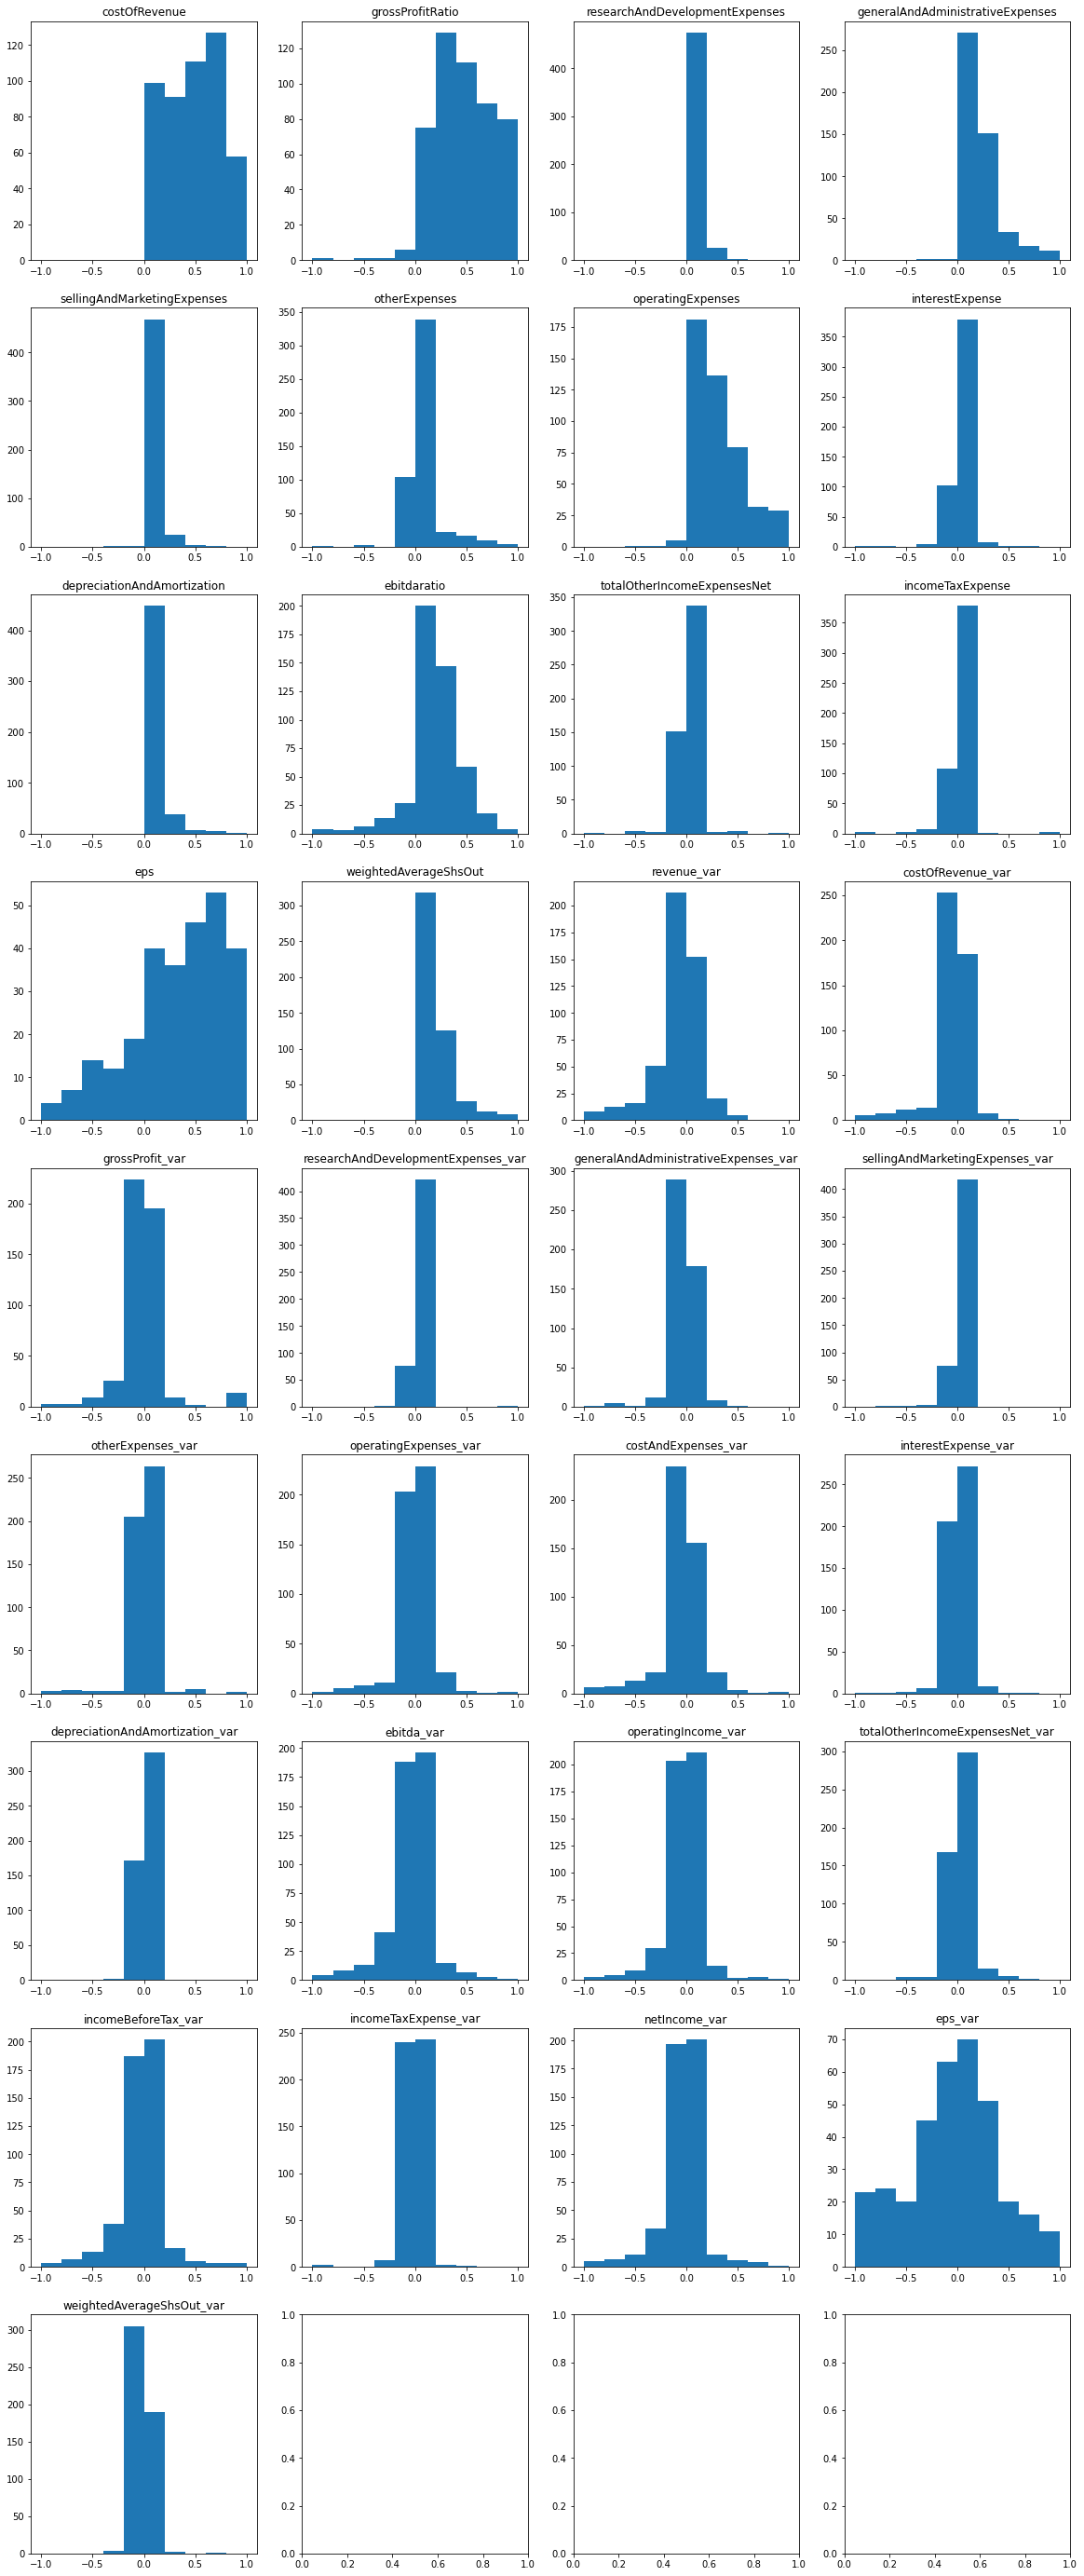

In [55]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(9,4,figsize=(20,50))
ax = ax.reshape((1,36))[0]
ls_columns = df_income_recent_var.columns
ls_columns = ls_columns[2:]
ls_columns
for i in range(len(ls_columns)):
    ax[i].set_title(ls_columns[i])
    ax[i].hist(df_income_recent_var[ls_columns[i]],range=(-1,1))

In [56]:
df_income_recent_var.reset_index().to_csv('income_cleansed.csv',index=False)